# CS2006 Practical 3

This Jupyter notebook provides an analysis of a data sample taken from the 2011 UK census containing 569,741 individuals.  Each individual in the dataset has 18 properties, which include age, sex, religion and economic activity.

The dataset and related information are available at www.ons.gov.uk/census/2011census.

The analysis has conducted in Python, primarily making use of the data processing library pandas and plotting library matplotlib.  These libraries have been used to provide a descriptive and graphical analysis of important trends and features of the dataset.

The following requirements have been implemented:

Basic Requirements:

1. Refine the dataset, checking for inconsistencies.
2. Descriptive analysis of parts of the dataset.
3. Frequency plots and pie charts to reveal interesting trends.

Additional Requirements:

1. (Easy) Produce two-way frequency tables of specific pairs of variables.
2. (Easy) Perform queries on the dataset to extract relevant information.
3. (Medium) Represent the tables from 1. as 3D plots.
4. (Medium) Use ipywidgets to construct interactive plots that change based on a user-defined selection.
5. (Hard) Use a map to interpret and show data.
6. (Hard) Conduct an analysis on another large dataset.
7. (Hard) Use Binder (www.mybinder.com) to provide a complete environment for reproducing the analysis.

The following import statements are required for the analysis:

In [1]:
# Force plots to appear interactively within Jupyter notebook.
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Data processing libraries.
import pandas as pd
import numpy as np
pd.Series.__unicode__ = pd.Series.to_string

# Plotting libraries.
import matplotlib as mpl
import matplotlib.pyplot as plt

# ipywidgets functionality.
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipykernel.pylab.backend_inline import flush_figures

# User defined utilities.
import utils
import refine
import descriptive
import plotting
import plotting_3D
import cricket

# Built-in utilities.
import copy
import inspect

## Basic Requirements
### 1. Dataset refinement
The dataset was read using a `pandas` function:

In [2]:
df = pd.read_csv("./census2011.csv")
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


The dataset was then refined using a series of functions that checked for missing values, values that were outside their specified ranges, and duplicate values.  This code is contained in the module `refine.py`, which is reproduced below:

In [3]:
print(inspect.getsource(refine))

"""Module containing functions to refine a dataset."""

import pandas as pd


def filter_null(df, variable):
    """Return records not containing null values in a specified column."""

    return df[pd.notnull(df[variable])]


def filter_type(df, variable, type_list):
    """Return records where a specified variable is in a specified set of values."""

    return df[df[variable].isin(type_list)]


def filter_digits(df, variable, max_digit, no_code):
    """Return records where digits are within a range or a specified 'no code' value."""

    if no_code is not None:
        return df[(df[variable].isin(range(0, max_digit + 1))) | (df[variable] == no_code)]
    else:
        return df[df[variable].isin(range(0, max_digit + 1))]


def filter_all_types(df, all_types):
    """Return records where a list of types are filtered on."""

    for type_list in all_types:
        return filter_type(df, *type_list)


def filter_digit_variables(df, digit_variables):
    """Return records where a list

Refining the dataset in this way produced an almost identical dataset:

In [4]:
df = refine.refine_data(df)
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


All codes in the dataset were then translated ino their corresponding values, as defined by the census parameters.  This translation step was conducted early in the analysis to ensure that future output was easily readable.  It must be noted that this choice represents a tradeoff between convenience and speed/memory usage.

In [5]:
#df_translated = utils.translate(df)
df_translated = pd.read_csv("./translated.csv")
df_translated.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,North East,Not Resident,Married/Civil Partnership,Usual Resident,Female,55 to 64,Married/Civil Partnership,False,UK,Good Health,White,Christian,Retired,"Process, Plant and Machine Operatives",Mining and Quarrying,No Code Required,DE
1,7394745,North East,Not Resident,Lone Parent Family (Female),Usual Resident,Male,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,Christian,Employee,"Process, Plant and Machine Operatives",Transport and Storage,49 or More Hours,C2
2,7395066,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,No Religion,Employee,"Caring, Leisure and Other Service",Human Health and Social Work,31 to 48 Hours,DE
3,7395329,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,16 to 24,Single (Never Married/Civil Partnership),False,UK,Good Health,White,Christian,Employee,Sales and Customer Service,Financial and Insurance,31 to 48 Hours,C1
4,7394712,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Male,45 to 54,Divorced or Formerly in a Civil Partnership,False,UK,Very Good Health,White,Christian,Employee,"Managers, Directors and Senior Officials",Wholesale and Retail Trade,31 to 48 Hours,C1


### 2. Descriptive analysis

A descriptive analysis of the dataset was then conducted using a number of modular functions:

In [6]:
print(inspect.getsource(descriptive))

"""Module with functions for a descriptive analyses of a dataset."""

import pandas as pd


def total_records(df):
    """Return message for total number of records in dataframe."""

    return "The total number of records in the dataframe is " + str(len(df)) + '.'

def all_data_types(df):
    """Return message for all data types in a dataframe."""

    return "All data types:\n" + str(df.dtypes)

def count_occurrences(df, ignore_variables):
    """Strip PersonID column, count values, and return message."""

    result = ""
    for column in df:
        if column not in ignore_variables:
            result += str(column) + " counts:\n" + str(df[column].value_counts()) + "\n" * 2

    return result



The descriptive analyses found the number of records in the dataset, the data types of each variable, and the number of observations of each unqiue value:

In [7]:
print(descriptive.total_records(df_translated) + "\n")
print(descriptive.all_data_types(df_translated) + "\n")
print(descriptive.count_occurrences(df_translated, ["Person ID"]))

The total number of records in the dataframe is 569740.

All data types:
Person ID                     int64
Region                       object
Residence Type               object
Family Composition           object
Population Base              object
Sex                          object
Age                          object
Marital Status               object
Student                        bool
Country of Birth             object
Health                       object
Ethnic Group                 object
Religion                     object
Economic Activity            object
Occupation                   object
Industry                     object
Hours worked per week        object
Approximated Social Grade    object

Region counts:
South East                  88083
London                      83582
North West                  71436
East of England             59411
West Midlands               56875
South West                  53774
Yorkshire and the Humber    53471
East Midlands            

### 3. Plotting

For plotting frequency counts and pie charts of a single variable, modular functions were written:

In [8]:
print(inspect.getsource(plotting))

import matplotlib.pyplot as plt
import textwrap


def plot_bar_group_count(
        data, field, title, title_pad=1.05, label_pad=15, wrap_chars=10
):

    sizes = data.groupby(field).size()

    axes = sizes.plot.barh()
    axes.set_title(title, y=title_pad)
    axes.set_xlabel("Frequency", labelpad=label_pad)
    axes.set_ylabel(field, labelpad=label_pad)

    labels = ['\n'.join(textwrap.wrap(str(label), wrap_chars, break_long_words=False)) for label in sizes.keys()]
    axes.set_yticklabels(labels)

    return axes


def plot_pie_group_count(
        data, field, title, percent_format="%1.1f%%", title_pad=1.1
):

    sizes = data.groupby(field).size()

    axes = sizes.plot.pie(autopct=percent_format)
    axes.set_title(title, y=title_pad)
    axes.set_ylabel('')
    axes.axis("equal")

    return axes



According to the sample data, the South East of England and London have the highest populations (shown in the plot below).  Wales and the North East of England have the smallest populations in the UK.

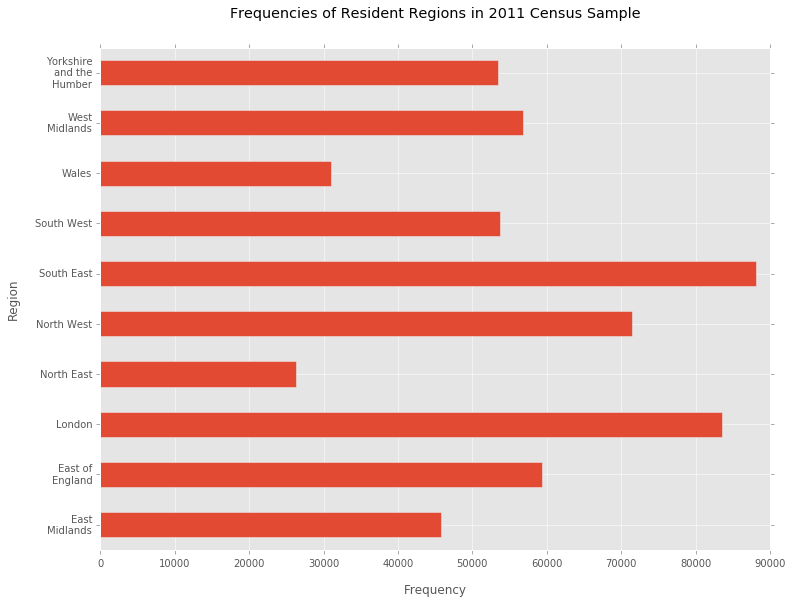

In [9]:
# Set the style for all forthcoming plots.
plt.style.use('ggplot')

plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    df_translated,
    'Region',
    'Frequencies of Resident Regions in 2011 Census Sample',
);

The largest employment group corresponds to the one with no code required, meaning that the largest group of people is the one containing those under 16, those who have never worked, and students or schoolchildren living away during the term-time.  Within the rest of the data, The largest groups are elementary occupations or professional groups.  The smallest group is the process, plant, and machine operatives.

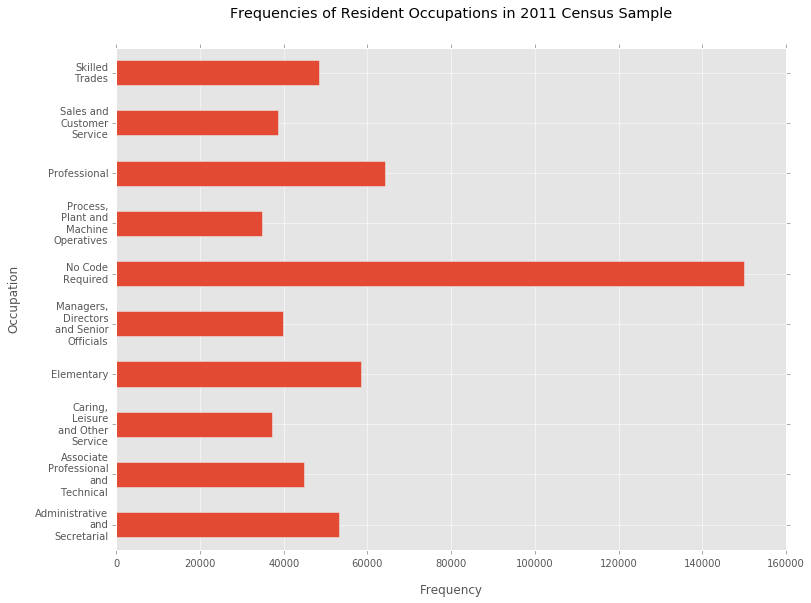

In [10]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    df_translated,
    'Occupation',
    'Frequencies of Resident Occupations in 2011 Census Sample',
);

With respect to age, the largest group is the one containing children under the age of 15.  The smallest group contains those people over the age of 75.  An interesting point to note is that for groups within the bounds of 16 and 64 years, the frequency counts are very similar.

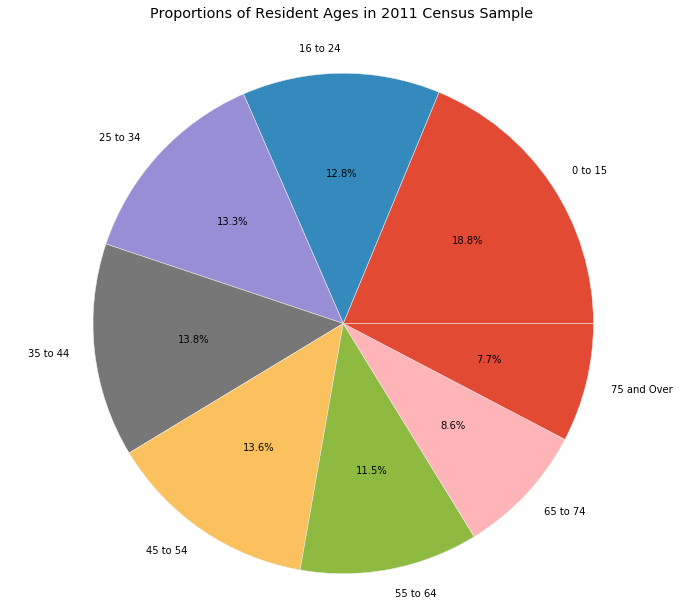

In [11]:
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    df_translated,
    'Age',
    'Proportions of Resident Ages in 2011 Census Sample',
);

Examining the proportions of the sample by their economic activity, the largest group is the group of people by far is those who are employed.  The second biggest group is the group for which there is no code, which means that they are children under the age of 16, full time students, or schoolchildren who live elsewhere during term-time.  There is also a large group of those who are retired, which captures the nature of the aging population in the UK.  Aside from these observations, the group sizes are fairly similar -- and range from around 2% of the total to 7% of the total.

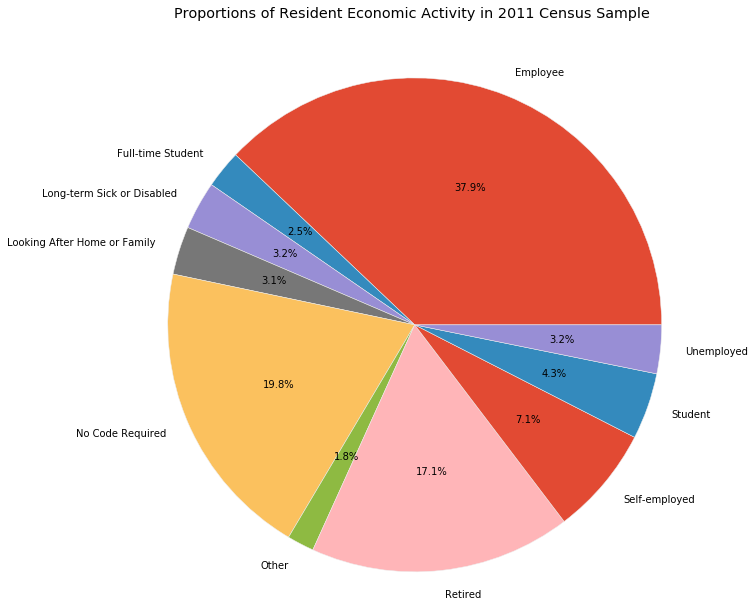

In [12]:
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    df_translated,
    'Economic Activity',
    'Proportions of Resident Economic Activity in 2011 Census Sample',
);

## Additional Requirements
### 1. Two-way frequency tables

For producing the following two-way frequency tables, the `pandas` function `crosstab` was used.  For all industries aside from agriculture, London has a far higher number of the working population than the rest of the regions -- especially the North East of England, which has a significantly lower number of people working in all industries than the rest of the country.  In addition, agriculture is the industry with the fewest workers.

In [13]:
pd.crosstab(df_translated['Region'], df_translated['Industry'])

Industry,Accommodation and Food Service,"Agriculture, Forestry and Fishing",Construction,Education,Financial and Insurance,Human Health and Social Work,Mining and Quarrying,No Code Required,"Other Community, Social and Personal Service",Public Adminstration and Defence,Real Estate,Transport and Storage,Wholesale and Retail Trade
Region,,,,,,,,,,,,,
East Midlands,1936,429,2500,3280,844,3952,6057,11669,1414,1751,3299,2518,6133
East of England,2336,616,3508,4291,2199,4977,5302,14748,2111,2514,5465,3841,7503
London,4054,55,3700,5373,4016,6109,3266,25517,3735,3015,9968,6570,8204
North East,1300,132,1574,1836,524,2524,2851,6854,848,1498,1883,1438,3087
North West,3355,357,3778,4890,1597,6764,7726,18755,2299,3096,5822,3981,9016
South East,3566,510,4895,6593,3059,7344,6651,22246,3316,4145,8708,6502,10548
South West,2712,697,3033,4039,1510,5085,5012,12401,1977,2973,4475,2961,6899
Wales,1641,403,1731,2313,594,2887,3504,7937,992,1714,2010,1500,3751
West Midlands,2281,396,2960,3984,1149,4848,7108,15768,1828,2061,4284,3141,7067


Examining a two-way frequency table of approximated social grade and occuption, by far the most frequent combination is where no code is required for either.  As the social grades change, the most frequent occupation in that group also changes.  For example: in the social group AB (the highest social code) the largest numbers of people are employed in managerial/professional occupations (generally high paying jobs), whereas in the social code DE (the lowest social code) the highest numbers of people seen to be employed in elementary/process operatives occupations (which tends to be lower paid).

In [14]:
pd.crosstab(df_translated['Occupation'], df_translated['Approximated Social Grade'])

Approximated Social Grade,AB,C1,C2,DE,No Code Required
Occupation,,,,,
Administrative and Secretarial,3000,44922,2353,2252,727
Associate Professional and Technical,7050,35435,647,986,819
"Caring, Leisure and Other Service",1061,6343,15555,13860,478
Elementary,902,7010,6500,42433,1638
"Managers, Directors and Senior Officials",19190,18555,584,967,492
No Code Required,1051,17787,2062,12169,116915
"Process, Plant and Machine Operatives",413,1719,11157,21087,441
Professional,48104,13223,891,1009,884
Sales and Customer Service,964,12184,2997,21347,1031


### 2. Dataset queries

This requirement revolved around filtering through data and returning insightful information.

Analysing the number of economically active people by region, we find that that the largest number of people live in the South East and London.  These locations both have the highest populations, and so this is the expected effect.

In [15]:
# Filter the dataset to only contain economically active individuals.
economic_activity = df[df["Economic Activity"].isin(range(1, 5))]
economic_activity = utils.translate(economic_activity)

pd.crosstab(index=economic_activity['Region'], columns='count')

col_0,count
Region,
East Midlands,23106
East of England,30568
London,44454
North East,12897
North West,35204
South East,45550
South West,27453
Wales,14877
West Midlands,27930


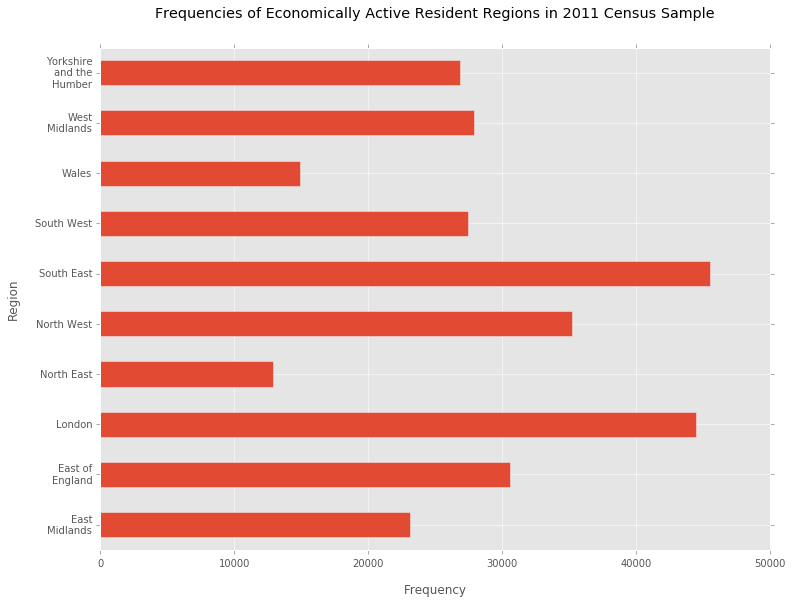

In [16]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    economic_activity,
    'Region',
    'Frequencies of Economically Active Resident Regions in 2011 Census Sample',
);

Examining the number of economically active people by age, the largest groups are those within the range of 25 to 44.  This is as would be expected, due to the largest total number of people being in those categories.  Furthermore, the number of economically people over the age of 65 is significantly lower -- again, as would be expected due to the proportion of these people who are retired.

In [17]:
pd.crosstab(index=economic_activity['Age'], columns='count')

col_0,count
Age,
16 to 24,41663
25 to 34,64326
35 to 44,67050
45 to 54,65736
55 to 64,40583
65 to 74,8022
75 and Over,1502


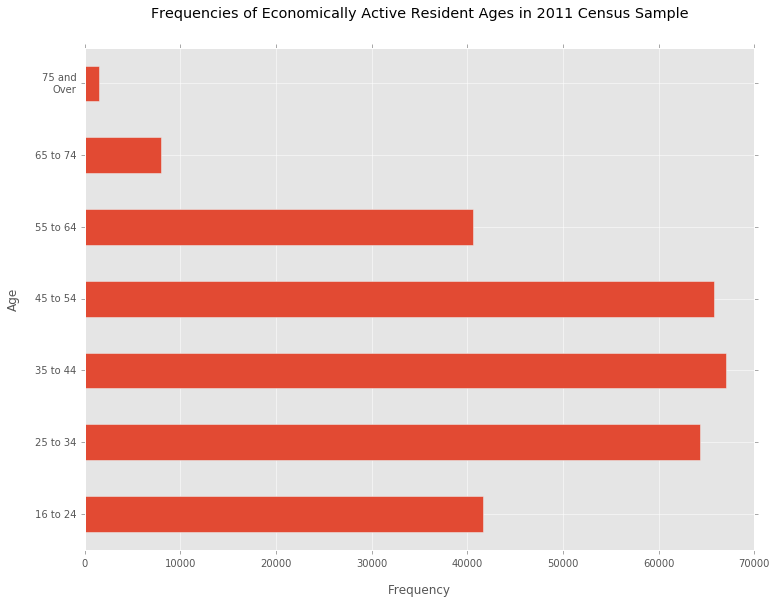

In [18]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    economic_activity,
    'Age',
    'Frequencies of Economically Active Resident Ages in 2011 Census Sample',
);

The next piece of analysis checks whether there are any discrepancies between the student status of an individual and their economic activity.  It would be illegal for a student to be anything other than an economically active (code 4) or economically inactive (code 6) student.  The analysis confirms that there are no conflicts, by filtering the dataset based on this query and checking the length of the resulting list of records.

In [19]:
def digit_discrepancies_query_filter(df, variable_a, values_a, variable_b, values_b):
    """Return records where two specified variables are in two specified sets."""

    return df[(df[variable_a].isin(values_a)) & (df[variable_b].isin(values_b))]

num_conflicting = len(digit_discrepancies_query_filter(df, "Student", [1], "Economic Activity", [1, 2, 3, 5, 7, 8, 9]))
print("There are " + str(num_conflicting) + " conflicting records.")

There are 0 conflicting records.


Additional analysis was conducted to calculate statistics relating to the hours worked by students.  The following analysis finds the average number of hours per week worked by all students, and the average number of hours worked by economically active students only.

In [20]:
def hours_categories(df):
    """Return a list of counts for the number of records in each working hours category."""

    codes = range(1, 5)

    return list(map(lambda i: len((df[df["Hours worked per week"] == i])), codes))


def elemwise_product(a, b):
    """Return the elementwise product of two arrays."""
    
    def product(t):
        x, y = t
        return x * y
    
    return sum(map(product, zip(a, b)))


# Extract dataframes for different classes of students.
df_students = df[df["Student"] == 1]
df_full_students = digit_discrepancies_query_filter(df_students, "Student", [1], "Economic Activity", [4])

# Retrieve the number of hours worked in each category by both datasets.
categories_students = hours_categories(df_students)
categories_full_students = hours_categories(df_full_students)

# Define the centre point of the hours categories.
num_hours_list = [7.5, 23, 39.5, 56.5]

# Calculate the total number of hours worked per student per week.
hours_students = elemwise_product(num_hours_list, categories_students) / len(df_students)
hours_full_students = elemwise_product(num_hours_list, categories_full_students) / len(df_full_students)

print("%.2f" % hours_students + " hours worked per week on average by all students.")
print("%.2f" % hours_full_students + " hours worked per week on average by economically active students.")

1.46 hours worked per week on average by all students.
13.07 hours worked per week on average by economically active students.


### 3. 3D plots

This section of analysis was conducted to represent the tables in additional requirement 1 as three dimensional plots.  The code used for this purpose is provided below.

In [21]:
print(inspect.getsource(plotting_3D))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import textwrap


def plot_3d_table_count(
        data, field_1, field_2, title, xlabel, ylabel, title_pad=1.05,
        label_pad=10, alpha=0.8, wrap_chars=15
):

    freq = pd.crosstab(data[field_1], data[field_2])
    x_grid, y_grid = np.meshgrid(range(len(freq.index)), range(len(freq.columns)))

    axes = plt.axes(projection="3d")

    for x, y, z in zip(x_grid, y_grid, np.array(freq).T):
        axes.bar(x, z, zs=y, zdir='y', alpha=alpha)

    axes.set_title(title, y=title_pad)
    axes.set_xlabel(xlabel, labelpad=label_pad)
    axes.set_ylabel(ylabel, labelpad=label_pad)
    axes.set_zlabel("Frequency", labelpad=label_pad)
    axes.set_xticks(range(len(freq.index)), minor=True)
    axes.set_yticks(range(len(freq.columns)), minor=True)

    x_labels = ['\n'.join(textwrap.wrap(str(label), wrap_chars, break_long_words=False)) for label in freq.index]
    y_labels = ['\n'.

First, we show a plot for the direct frequency comparison of region and industry.

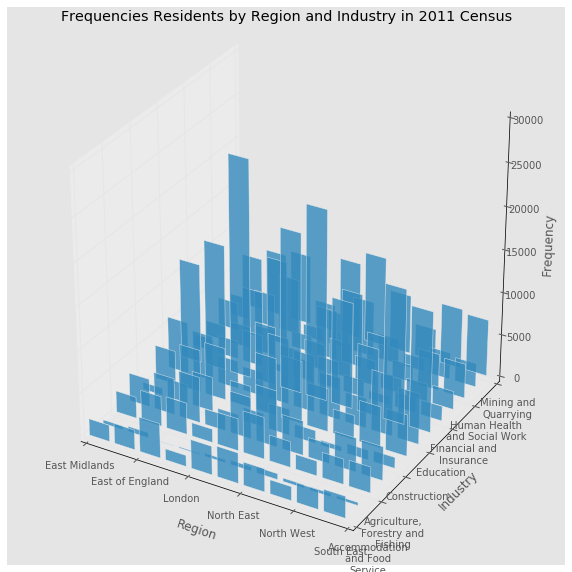

In [22]:
plt.figure(figsize=(10, 10))
plotting_3D.plot_3d_table_count(
        df_translated,
        'Region',
        'Industry',
        'Frequencies Residents by Region and Industry in 2011 Census',
        'Region',
        'Industry',
);

Next, we show a plot for the direct frequency comparison of occupation and social grade.

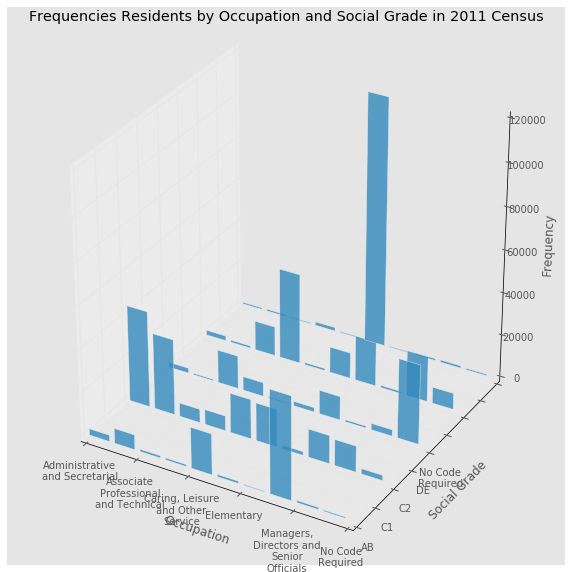

In [23]:
plt.figure(figsize=(10, 10))
plotting_3D.plot_3d_table_count(
        df_translated,
        'Occupation',
        'Approximated Social Grade',
        'Frequencies Residents by Occupation and Social Grade in 2011 Census',
        'Occupation',
        'Social Grade',
);

### 4. ipywidgets

ipywidgets to analyse the number of people working in industry for different regions and ages. Age had to be a drop down box as opposed to a slider due to the fact that in the amended dataframe, the age is no londer a code, but is instead a string. 

In [24]:
def industryfunc(Region,Age):
    temp = df_translated[(df_translated['Region'] == Region) & (df_translated['Age'] == Age)]
    name = "Industry count of ages " + Age +" in " + Region
    plt.figure(figsize=(10, 10))
    plotting.plot_bar_group_count(
        temp, 
        'Industry', 
        name,
        wrap_chars = 20
    )
    flush_figures()
regionvalues = df_translated.Region.unique()
regionvalues = regionvalues.tolist()

agevalues = df_translated.Age.unique()
agevalues = agevalues.tolist()

interact(industryfunc, Region=regionvalues, Age=(agevalues));

### 5. Analysis of alternate dataset

The data set which we chose to analyse for our extension was the dataset of all of the balls bowled in the Group Stages of the Indian Premier League cricket competition in 2016. The data was sourced from the following website: http://cricsheet.org/downloads/ in the IPL competition section of the page. All of the .csv files not from the group stages were filtered out and then the remaining files were parsed into the program.

In [26]:
IPLData = cricket.get_data()

Sample of how the dataset looks after being parsed into the program. 

In [28]:
IPLData.head()

,Match Number,Winner,Venue,Innings,Bowling Team,Ball No.,Batting Team,Striker,Non - Striker,Bowler,Runs,Extras,How Out,Batsman Out
2182,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.1,Mumbai Indians,LMP Simmons,RG Sharma,RP Singh,1,0,-,-
2183,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.2,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,0,0,-,-
2184,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.3,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,2,0,-,-
2185,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.4,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,4,0,-,-
2186,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.5,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,1,0,-,-


In [29]:
#Number of each type of Runs by ball for each venue
numGameAtVenue = IPLData.drop_duplicates('Match Number')['Venue'].value_counts()
numGameAtVenue
def getNoGames(row):
    venueCount = numGameAtVenue.index == row.name
    venueCount = numGameAtVenue[list(venueCount).index(True)]
    temp = (row / venueCount)
    return temp.astype(int)

Total_Runs = IPLData['Runs'] + IPLData['Extras']
Total_Runs = Total_Runs.rename('No. Of Runs on Ball')
Total_Runs = pd.crosstab(IPLData['Venue'],Total_Runs)
Total_Runs = Total_Runs.apply(getNoGames,axis =1)
del Total_Runs[7]
Total_Runs

No. Of Runs on Ball,0,1,2,3,4,5,6
Venue,,,,,,,
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,90,92,12,1,23,0,10
Eden Gardens,76,91,16,0,25,1,10
Feroz Shah Kotla,75,107,17,0,25,0,10
Green Park,82,93,7,0,30,1,10
M Chinnaswamy Stadium,73,100,13,0,30,0,18
Maharashtra Cricket Association Stadium,66,118,21,1,28,0,11
"Punjab Cricket Association IS Bindra Stadium, Mohali",67,107,24,0,32,0,7
"Rajiv Gandhi International Stadium, Uppal",83,97,18,1,23,0,8
Saurashtra Cricket Association Stadium,70,103,24,1,28,0,6


When analysing the stadia, the data had to be edited to account for the fact that not equal numbers of matches were played at all of the grounds, thus to make the data fair, all values were averaged out to for each mat
Looking at the number of each ball appearing at each venue The two most common values for balls at any ground were dot balls and 1's, which is logical as they are the type of runs which are the easiest to score for both the batting and the bowling side. 


In [30]:
def FrequencyOfRunsStadiumFunc(Balls_Per_Venue):
    stadia = Total_Runs.loc[Balls_Per_Venue]
    stadia = pd.DataFrame(stadia)
    BallStadiumGraph = stadia.plot(kind ="Barh",legend = False,figsize=(8,5),title = "Averge number of times all runs were made per game \nat "+ Balls_Per_Venue)
    BallStadiumGraph.set_xlabel("Average Number of Occurrences per Game")
    BallStadiumGraph.set_ylabel("Runs")
    flush_figures()

stadiaRuns = list(Total_Runs.index)
interact(FrequencyOfRunsStadiumFunc, Balls_Per_Venue=stadiaRuns);

Examining the data, the ground at which the most number of sixes was the M Chinnaswamy stadium, a ground which has a reputation for being one of the highest scoring grounds in the country.

In [31]:
def stadiumFunc(Runs_Per_Ball_Per_Game):
    stadiumsBall = Total_Runs[int(Runs_Per_Ball_Per_Game)]
    stadiumsBallGraph = stadiumsBall.plot(kind ="Barh",figsize=(11,7),title = "Averge number of times " + str(Runs_Per_Ball_Per_Game) + " runs were made per game in every stadium")
    stadiumsBallGraph.set_xlabel("Average Occurrence per Game")
    stadiumsBallGraph.set_ylabel("Stadium")
    flush_figures()
    
stadiaRuns = list(Total_Runs.columns.values)
interact(stadiumFunc, Runs_Per_Ball_Per_Game=stadiaRuns);

In [32]:
#Number of each type of Runs by ball for each ball
totalRuns = IPLData['Runs'] + IPLData['Extras']
totalRuns = totalRuns.rename('No. Of Runs on Ball')
NumberRunsByBall = pd.crosstab(IPLData['Ball No.'],totalRuns)
NumberRunsByBall

No. Of Runs on Ball,0,1,2,3,4,5,6,7
Ball No.,,,,,,,,
0.1,69,26,3,0,12,2,0,0
0.2,64,28,4,0,14,1,1,0
0.3,56,30,8,1,16,0,1,0
0.4,62,26,6,0,16,0,2,0
0.5,56,40,4,2,8,0,2,0
0.6,54,37,6,0,14,0,1,0
0.7,9,6,0,0,1,1,1,0
0.8,3,0,0,0,1,0,0,0
0.9,1,0,0,0,0,0,0,0


Analysing the type and number of runs scored in each over, as the number of the over goes up, the frequency of boundaries also goes up. Furthermore, in the middle overs, i.e. between overs 7-15, the number of 1's and 2's goes up significantly as the batsmen looked to try and rotate strike. In the powerplay, there is an increased number of dots and an increased number of boundaries as compared to the middle overs as the batsmen look to try and score in the fielding restrictions. 

In [33]:
def OverNum(Over_Number):
    OverRuns = NumberRunsByBall[(NumberRunsByBall.index < Over_Number) & (NumberRunsByBall.index>(Over_Number-1))]
    del OverRuns[7]
    OverRunsGraph = OverRuns.plot(kind ="Barh",figsize=(12,12),title = "Count of Run Type for each Ball in Over Number "+ str(Over_Number))
    OverRunsGraph.set_xlabel("Totals")
    OverRunsGraph.set_ylabel("Balls in Over "+ str(Over_Number))
    OverRunsGraph.legend(["Dot Ball","One Run","Two Runs","Three Runs", "Four Runs", "Five Runs","Six Runs"],loc='center left', bbox_to_anchor=(1.0, 0.5))
    flush_figures()
interact(OverNum, Over_Number=(1,20));

Comparing runs per innings, there is significantly more runs in the first innings overall, this makes sense due to the large number of wins, when the winning team was batting first ~ under half the time.

In [34]:
# Runs by innings
InningsRuns = IPLData.groupby(['Innings'])['Runs'].sum()
InningsRuns = pd.Series.to_frame(InningsRuns)
InningsRuns

,Runs
Innings,
1,8688
2,7995


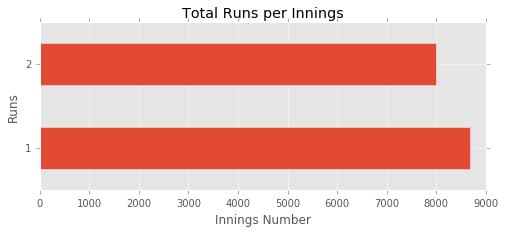

In [35]:
InningRunsGraph = InningsRuns.plot(kind = "Barh",legend = False, figsize=(8,3),title = "Total Runs per Innings")
InningRunsGraph.set_xlabel("Innings Number")
InningRunsGraph.set_ylabel("Runs")
InningRunsGraph;

Comparing extras by Innings, there are far more extras in the second innings than the first innings, this would make sense as there would be far more pressure on the bowling team in the second innings which would lead to more mistakes than the (relatively) pressure free first innings

In [36]:
# Extras by innings
InningsExtras = IPLData.groupby(['Innings'])['Extras'].sum()
InningsExtras = pd.Series.to_frame(InningsExtras)
InningsExtras

,Extras
Innings,
1,378
2,449


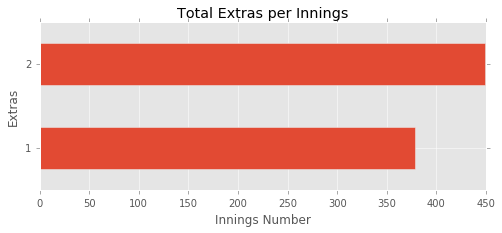

In [37]:
InningExtrasGraph = InningsExtras.plot(kind = "Barh",legend = False, figsize=(8,3),title = "Total Extras per Innings")
InningExtrasGraph.set_xlabel("Innings Number")
InningExtrasGraph.set_ylabel("Extras")
InningExtrasGraph;

Comparing the types of the runs which were scored by each team, some observations were made. 
For each team, the 2 largest Types of runs were 0s and 1s, 0s are common as that is a ball when nothing happened, and 1s as they are the easiest type of run to make on average in a cricket game. Very few three's were scored however, this may have been due to the fact that stadium's in India aren't massive, and the ground isn't big enough to allow the batsmen to run three runs. 

For each type of run, for the majoprity of teams, running the data from 1 through to 6, the majority of teams scored similar amounts of runs, however there are certain anomalies, for example Mumbai and Kolkata scored significantly less 2s than the other teams, and the RCB scored more 6s and 4s than any other team.

In [38]:
# Type of Runs by Teams
teamRuns = IPLData['Runs'] + IPLData['Extras']
teamRuns = teamRuns.rename('Count of Run Type')
teamsRunTypes = pd.crosstab(IPLData['Batting Team'], teamRuns)
teamsRunTypes

Count of Run Type,0,1,2,3,4,5,6,7
Batting Team,,,,,,,,
Delhi Daredevils,561,704,127,2,180,6,65,0
Gujarat Lions,552,693,125,6,208,5,52,0
Kings XI Punjab,544,710,154,5,193,1,54,0
Kolkata Knight Riders,466,741,108,6,189,4,62,0
Mumbai Indians,625,667,92,7,186,4,93,0
Rising Pune Supergiants,521,685,123,9,173,1,68,0
Royal Challengers Bangalore,471,729,129,4,215,6,121,1
Sunrisers Hyderabad,576,691,139,9,181,6,65,0


In [39]:
def frequencyRunTypeFunc(TeamName):
    teamRunsFrequency = teamsRunTypes.loc[TeamName]
    teamRunsFrequency = pd.DataFrame(teamRunsFrequency)
    TeamRunsFrequencyGraph = teamRunsFrequency.plot(kind ="Barh",legend = False,figsize=(8,5),title = "Averge number of times all runs were made by \n "+ TeamName)
    TeamRunsFrequencyGraph.set_xlabel("Total Occurrences")
    TeamRunsFrequencyGraph.set_ylabel("Runs")
    flush_figures()
    
teamNames = list(teamsRunTypes.index)
interact(frequencyRunTypeFunc, TeamName=teamNames);

In [40]:
def runTypeFunc(RunType):
    teamRunTypes = teamsRunTypes[int(RunType)]
    teamRunTypesGraph = teamRunTypes.plot(kind ="Barh",figsize=(12,7),title = "Number of times " + str(RunType) + " was scored by each team")
    teamRunTypesGraph.set_xlabel("Total Occurrences")
    teamRunTypesGraph.set_ylabel("Team")
    flush_figures()
    
TeamRunsTypesList = list(teamsRunTypes.columns.values)
interact(runTypeFunc, RunType=TeamRunsTypesList);

In [41]:
# Top Wicket Takers in the IPL
def getBowlingTeam(row):
    record = allBowlers[allBowlers['Bowler'] == row.name]
    temp = record['Bowling Team']
    temp = temp.values 
    return temp
allBowlers = IPLData.drop_duplicates(subset = 'Bowler')
bowlerswickets = IPLData[((IPLData['How Out'] != '-') & (IPLData['How Out'] != 'run out'))]
allwickets = bowlerswickets['Bowler'].value_counts()
allwickets = pd.Series.to_frame(allwickets)
allwickets.insert(1,'Team',None)
allwickets = allwickets.sort_values('Bowler',ascending = 0)
allwickets['Team'] = allwickets.apply(getBowlingTeam, axis=1)
allwickets

,Bowler,Team
YS Chahal,19,Royal Challengers Bangalore
B Kumar,18,Sunrisers Hyderabad
MJ McClenaghan,17,Mumbai Indians
Mustafizur Rahman,16,Sunrisers Hyderabad
SR Watson,16,Royal Challengers Bangalore
JJ Bumrah,15,Mumbai Indians
Sandeep Sharma,15,Kings XI Punjab
AD Russell,15,Kolkata Knight Riders
DJ Bravo,15,Gujarat Lions
DS Kulkarni,14,Gujarat Lions


Analysing the highest wicket takers, there appear to be 2 major groups, number of wickets over 16, and number of wickets under 16, however the numbers of wickets taken were quite close whhich would suggest that there were a number of people who got close to the highest number of wickets. 

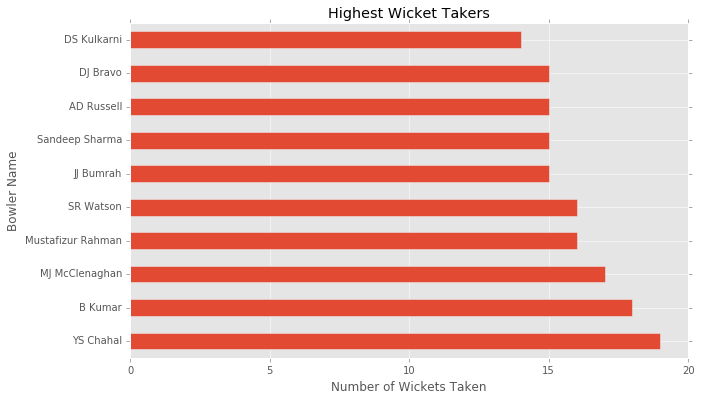

In [42]:
Top10WicketTakersGraph = allwickets.ix[:10].plot(kind = "Barh",figsize=(10,6),sort_columns = True,title =("Highest Wicket Takers"),legend = False)
Top10WicketTakersGraph.set_xlabel("Number of Wickets Taken")
Top10WicketTakersGraph.set_ylabel("Bowler Name")
Top10WicketTakersGraph;

Analysing the dataset, we find a surprising trend. For the teams who took the most wickets, there were many bowlers who took those wickets, so they have quite a lot of players with a lot of wickets, whereas in teamsn which did not take as many wickets, the large proportion opf the wickets were shared out between 1 or 2 players. 

In [49]:
def bowlingfunc(Team):
    teamNameWickets = bowlerswickets[bowlerswickets['Bowling Team'] == Team]
    name = "Total Wickets in " + Team
    plt.figure(figsize=(10, 7))
    plotting.plot_bar_group_count(
        teamNameWickets, 
        'Bowler', 
        name,
        wrap_chars = 20
    )
    flush_figures()
wickets = allwickets.Team.unique()
wickets = wickets.tolist()

interact(bowlingfunc, Team=wickets);

In [50]:
allBatsmen = IPLData.drop_duplicates(subset = 'Striker')
allBatsmen

,Match Number,Winner,Venue,Innings,Bowling Team,Ball No.,Batting Team,Striker,Non - Striker,Bowler,Runs,Extras,How Out,Batsman Out
2182,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.1,Mumbai Indians,LMP Simmons,RG Sharma,RP Singh,1,0,-,-
2183,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,0.2,Mumbai Indians,RG Sharma,LMP Simmons,RP Singh,0,0,-,-
2189,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,1.2,Mumbai Indians,HH Pandya,LMP Simmons,I Sharma,0,3,-,-
2207,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,3.6,Mumbai Indians,JC Buttler,HH Pandya,I Sharma,0,0,-,-
2209,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,4.2,Mumbai Indians,AT Rayudu,JC Buttler,MR Marsh,0,0,-,-
2216,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,5.3,Mumbai Indians,KA Pollard,AT Rayudu,I Sharma,0,5,-,-
2230,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,7.2,Mumbai Indians,S Gopal,AT Rayudu,R Bhatia,0,0,-,-
2253,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,11.1,Mumbai Indians,Harbhajan Singh,AT Rayudu,R Bhatia,0,0,-,-
2278,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,15.2,Mumbai Indians,R Vinay Kumar,Harbhajan Singh,R Ashwin,0,0,-,-
2302,1,Rising Pune Supergiants,Wankhede Stadium,1,Rising Pune Supergiants,19.1,Mumbai Indians,MJ McClenaghan,Harbhajan Singh,I Sharma,1,0,-,-


In [48]:
# Top Run Scorers
def getBattingTeam(row):
    record = allBatsmen[allBatsmen['Striker'] == row.name]
    teamName = record['Batting Team']
    teamname = teamName.values 
    return teamName

allBatsmen = IPLData.drop_duplicates(subset = 'Striker')
allruns = IPLData.groupby(['Striker'])['Runs'].sum()
allruns = pd.Series.to_frame(allruns)
allruns = allruns
allruns.insert(1,'Team',None)
allruns = allruns.sort_values('Runs',ascending =0)
allruns['Team'] = allruns.apply(getBattingTeam, axis=1)
allruns

,Runs,Team
Striker,,
V Kohli,919,NaN
DA Warner,658,NaN
AB de Villiers,603,NaN
RG Sharma,489,NaN
AM Rahane,480,NaN
G Gambhir,473,NaN
S Dhawan,463,NaN
M Vijay,453,NaN
Q de Kock,445,NaN


The top 10 run scorers for the IPL in 2016 were mainly in three categories, the top player was V Kohli, an RCB player, who had an excellent IPL season when he scored far more runs than any other player, then there were 2 players who also had good seasons, AB de Villiers and David Warner, who were among the highest scorers. Then you have the other players in the top 10 who scored similar numbers of runs and had a good IPL.

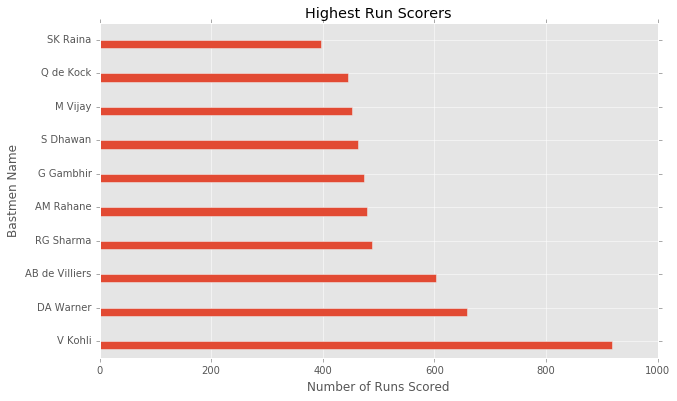

In [45]:
Top10RunScorersGraph = allruns.ix[:10].plot(kind = "Barh",figsize=(10,6),sort_columns = True,title =("Highest Run Scorers"),legend = False)
Top10RunScorersGraph.set_xlabel("Number of Runs Scored")
Top10RunScorersGraph.set_ylabel("Bastmen Name")
Top10RunScorersGraph;

The main type of run scoring in a team across a season, there are some batsmen who score more than any other batsmen in the team, and the rest of the team scores slightly lower amount of runs. This ratio differs significantly depending on the team. There are teams in which a few individuals scored significntly more runs than all of the other people in the team. In teams such as Royal Challangers Bangalore and the Sunrisers Hyderabad, 2 or 3 batsmen scored many more runs than any other people in the team. There are some teams which didn't make the playoffs in which a single batsmen scored the majority of the runs, for example the Rising Pune Supergiants and the Mumbai Indians, which suggests that to make more runs and win more games, a number of batsmen need to scoree a lot of runs for the team. 

In [46]:
def runscorers(Team):
    teamNameRuns = allruns[allruns['Team'] == Team]
    teamRunsGraph = teamNameRuns.plot(kind = "Barh",figsize=(7,7),sort_columns = True,title =("Highest Run Scorers for " + Team),legend = False)
    teamRunsGraph.set_xlabel("Number of Runs Scored")
    teamRunsGraph.set_ylabel("Bastmen Name")
    flush_figures()
    
runs = allruns.Team.unique()
runs = runs.tolist()

interact(runscorers, Team=runs);

TraitError: Invalid selection

Checking the number of runs each team scored, we find that the RCB scored significantly more runs than all of the other teams, this could have been due to the fact that they played all of their home games at the M Chinnaswamy stadium, a significantly smaller ground which has higher scores on it, in addition to the RCB having 2 of the world's best batsmen playing for them. All of the other teams are relatively closer together in terms of runs, which further exaggerates the number of runs which the RCB made. 

In [ ]:
# Total Team Runs
teamruns = IPLData.groupby(['Batting Team'])['Runs'].sum()
teamruns = pd.Series.to_frame(teamruns)
teamruns = teamruns.sort_values('Runs',ascending = 0)
teamruns

In [ ]:
teamRunsGraph = teamruns.plot(kind = "barh",legend = False,title = "Total Number of Runs by Team",figsize=(7,4))
teamRunsGraph.set_xlabel("Number of Runs")
teamRunsGraph.set_ylabel("Team")
teamRunsGraph;

The team which had the most number of extras was the Kolkata Knight Riders, and the other teams were spread until the Kings XI Punjab, who had the lowest number of extras throughout the season.

In [ ]:
# Total Team Extras
teamextras = IPLData.groupby(['Batting Team'])['Extras'].sum()
teamextras = pd.Series.to_frame(teamextras)
teamextras = teamextras.sort_values('Extras',ascending = 0)
teamextras

In [ ]:
teamExtrasGraph = teamextras.plot(kind = "barh",legend = False,title = "Total Number of Extras by Team",figsize=(7,4))
teamExtrasGraph.set_xlabel("Number of Extras")
teamExtrasGraph.set_ylabel("Team")
teamExtrasGraph;

Analysing the total number of wickets by team, the Team which took the most wickets was the Kolkata Knight Riders, followed by the RCB, both teams which made the playoffs. The teams which took thbe least number of wickets were Mumbai Indians and the Gujrat Lions, surprisingly the Gujrat Lions were the team which had the highest number of wins, showing that they were extremely reliant on their batting to win their games, something which was furthered by the fact that they only won 1 game batting first, which meant that their bowling lineup was not able to take wickets and win the game. 

In [ ]:
# Total Team Wickets
teamwickets = IPLData[((IPLData['How Out'] != '-'))]
teamwickets = teamwickets['Bowling Team'].value_counts()
teamwickets = pd.Series.to_frame(teamwickets)
teamwickets = teamwickets.sort_values('Bowling Team',ascending = 0)
teamwickets

In [ ]:
teamWicketsGraph = teamwickets.plot(kind = "barh",legend = False,title = "Total Number of Wickets by Team",figsize=(7,5))
teamWicketsGraph.set_xlabel("Number of Wickets")
teamWicketsGraph.set_ylabel("Team")
teamWicketsGraph;

Examining the total number of wins by team in the playoff stages, The 4 teams which were in the playoff stages were the 4 teams at the top of the number of wins ratio. The eventual winners however were not the Gujrat Lions as you might have expected with their highest tally of wins in the group stage, but rather the Sunrisers Hydrabad, who beat the Royal Challengers Bangalore, despite the fact that the match was played at the Home of the RCB. 

In [ ]:
#number of wins per team 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
teamwins = allwins['Winner'].value_counts()
teamwins = teamwins.rename('Wins')
teamwins = pd.Series.to_frame(teamwins)
teamwins = teamwins.rename(columns = {'Batting Team':'Wins'})
teamwins

In [ ]:
teamWinsGraph = teamwins.plot(kind = "Barh",legend = False, title = "Total Number of Wins by team",figsize=(8,5))
teamWinsGraph.set_xlabel("Number of Wins")
teamWinsGraph.set_ylabel("Team");

Examining the wins batting first or batting second, All teams apart from the Royal Challengers Bangalore have a higher win ratio batting second, thisb is probably due to the fact that you know the target you are chasing rather than having to set a target. Some teams had a significant difference in the number of wins that they got batting first vs batting second, for example the Gujrat Lions, which would suggest that those teams had very good battling lineups, or a weaker bowling lineup, or a combination of both. 

In [ ]:
#Wins By Batting First or second 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
winsBatting = allwins[(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Batting Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Bowling Team']))]
winsBatting = winsBatting['Winner'].value_counts()
winsBatting = pd.Series.to_frame(winsBatting)
winsBatting['Won Batting Second'] = allwins['Winner'][(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Bowling Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Batting Team']))].value_counts()
winsBatting = winsBatting.rename(columns = {'Winner':'Won Batting First'})
winsBatting

In [ ]:
winsBattingGraph = winsBatting.plot(kind = "Barh",legend = False,figsize=(10,8), title = "Number of wins by Batting First Vs Batting Second")
winsBattingGraph.set_xlabel("Number of Wins")
winsBattingGraph.set_ylabel("Team")
winsBattingGraph.legend(["Batting First Wins","Batting Second Wins"],loc='center left', bbox_to_anchor=(1.0, 0.5))
winsBattingGraph;